# Data Analytics

## Exploratory Data Analysis (EDA): Data Cleaning

In [1]:
import pandas as pd
import matplotlib as mpl  # Importando matplotlib 
import matplotlib.pyplot as plt  
plt.style.use('seaborn') 
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [7]:
startup_data = pd.read_csv(r'investments_VC.csv')

In [8]:
startup_data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40.000,operating,EST,NaN,Tallinn,...,0,0,0,0,0,0,0,0,0,0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0,0,0,0,0,0,0,0,0,0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60.000,operating,USA,TX,Dallas,...,0,0,0,0,0,0,0,0,0,0


In [9]:
startup_data.shape

(49438, 39)

In [10]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  int64  
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [11]:
startup_data['homepage_url'].isnull() # ¿Observación = NA ? True/False

0        False
1        False
2        False
3        False
4         True
         ...  
49433    False
49434    False
49435    False
49436    False
49437    False
Name: homepage_url, Length: 49438, dtype: bool

In [12]:
startup_data['homepage_url'].isnull().sum() # Revisa número de NA en la variable

3449

In [13]:
startup_data.isnull().sum()  # Revisa número de NA de todas las variables

permalink                   0
name                        1
homepage_url             3449
category_list            3961
 market                  3968
 funding_total_usd          0
status                   1314
country_code             5273
state_code              19277
region                   5273
city                     6116
funding_rounds              0
founded_at              10884
founded_month           10956
founded_quarter         10956
founded_year            10956
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C   

In [14]:
startup_data.shape

(49438, 39)

In [15]:
startup_data = startup_data.dropna()

Borrar todos los renglones con datos nulos - es el mas común
asumir que dato podria llevar 
trabajar con esos datos sin limpiarlos 

para quitarlo usamos .dropna () - borra renglones con valores nulos
    si queremos que los borre solo si todo el renglon esta lleno de datos nulos no sirve
    tambien puede quitar todas las a o letras, pero podria quitarnos datos que si queremos 
    
.dropna (how = any - todos los valores nulos que aparecen), pero quito aquí muchos y solo dejo dos paises de los que teniamos 

In [16]:
startup_data.shape  

(21840, 39)

In [2]:
startup_data = pd.read_csv(r'investments_VC.csv')

In [3]:
startup_data.describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [27]:
startup_data.keys()

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [28]:
startup_data[' market '].value_counts()

 Software                    4620
 Biotechnology               3688
 Mobile                      1983
 E-Commerce                  1805
 Curated Web                 1655
                             ... 
 Distributed Generation         1
 Writers                        1
 Realtors                       1
 Social Opinion Platform        1
 Musical Instruments            1
Name:  market , Length: 753, dtype: int64

In [29]:
startup_data[' market '] = startup_data[' market '].fillna('Software')

con fillna llenamos los valores nulos con una palabra o número 

In [30]:
startup_data[' market '].isnull().sum()

0

Si esto se tratara de valores numéricos; se puede también utilizar...
* startup_data[].fillna(startup_data[].mean())
* startup_data[].fillna(startup_data[].median())

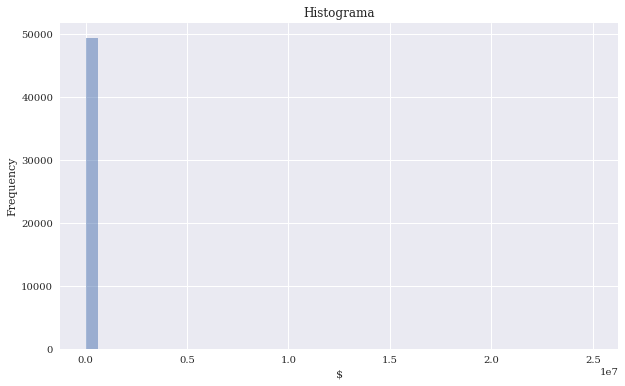

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(startup_data['equity_crowdfunding'], stacked=True, bins=40, alpha=0.5)  
plt.xlabel('$')
plt.ylabel('Frequency')
plt.title('Histograma');